In [36]:
import random
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt

def fitness(SE, items, b, p, item_weights):
    
    # Evalutate fitness for each ants path
    d = [0 for n in range(p)]
    # For ant_path in ant_paths
    for n in range(p):
        
        # bin_weights: list of weight in bins, index = bin
        bin_weights=[0 for j in range(b)]
        # For item in ant_path
        for i in range(items):
            # Add item weight to weight of bin running total
            bin_weights[SE[n][i]-1] += item_weights[i]
            
        # difference d: heaviest - lightest bins = fitness for each ant
        d[n] = max(bin_weights) - min(bin_weights)
    return d

def ACO_BPP(p, rho, bpp , gen = None):
    
    # 10000 fitness evaluations per ant
    if gen:
        # `gen` fitness evaluations - 1000 - further experimentation 
        evaluations = int(gen)
    else:
        evaluations = int(10000/p)
    # items: num_items (500)
    items = 500
    
    # bpp: BPP1 or BPP2 (1 or 2)
    # item_weights: list of item weight (i or i^2)
    # num_bins: (10 or 50), depends or BPP1 or BPP2
    if (bpp == 1):
        num_bins = 10
        item_weights = [i + 1 for i in range(items)]
    elif (bpp == 2):
        num_bins = 50
        item_weights = [((i + 1) * (i +1 )) for i in range(items)]
        
    # 1. Randomly distribute small amounts of pheromone (between 0 and 1) on the construction graph.
    # T: Pheromone matrix 500 lists of phermones each for each bin
    T=[[random.random() for j in range(num_bins)] for i in range(items)]
#     print('\n'.join([''.join(['{:10}'.format(item) for item in row]) for row in T]))
    
    x_axis = [gen for gen in range(evaluations)]
    y_axis = [0 for gen in range(evaluations)]
    # 5. If a termination criterion has been reached, then stop. Otherwise return to step 2. 
    for gen in range(evaluations):
        
        # 2. Generate a set of p ant paths from S to E
        # SE: set of ant paths from S to E 
        SE = [[] for n in range(p)] 
        denom = np.sum(T, axis = 1)
        # Pij: corresponding probabilities to each entry in T i j
        Pij=[T[i]/denom[i] for i in range(items)]
        for n in range(p):
            for i in range(items):
                SE[n].append(choice([bin for bin in range(num_bins)], p=Pij[i])+1) 
        
        #3. Update the pheromone in your pheromone table for each ant’s path according to its fitness.
        d = fitness(SE, items, num_bins, p, item_weights) 
        for n in range(p): 
            for i in range(items):
                # T: Pheromone matrix
                T[i][SE[d.index(d[n])][i]-1] += 100/d[n] 
        # Record best fitness to plot
        y_axis[gen] = min(d) 
        
        # 4. Evaporate the pheromone for all links in the graph. 
        # Evaporation: (1-rho) * T (pheromone matrix)
        T = [[(1-rho) * T[i][j] for j in range(num_bins)] for i in range(items)] 
        
        # Printing Initial state, best, worst and average fitness reached at the beginning of each trial
        if (gen == 0):
            print("Initial State: ")
            print("Fitness:    Best: ",min(d), "  Worst: ", max(d), "  Average: ", sum(d) / len(d))

        # Printing results, Record the best, worst and average fitness reached at the end of each trial
        elif (gen == evaluations - 1):
            print("Result:")
            print("Fitness:    Best: ",min(d), "  Worst: ", max(d), "  Average: ", sum(d) / len(d))
    
    return x_axis,y_axis

# Experiment 1 

# Run five trials of the ACO with p = 100 and e = 0.90 

BBP1
Trial 1, BBP =  1
Initial State: 
Fitness:    Best:  2768   Worst:  12684   Average:  6135.64
Result:
Fitness:    Best:  1883   Worst:  5785   Average:  3695.24


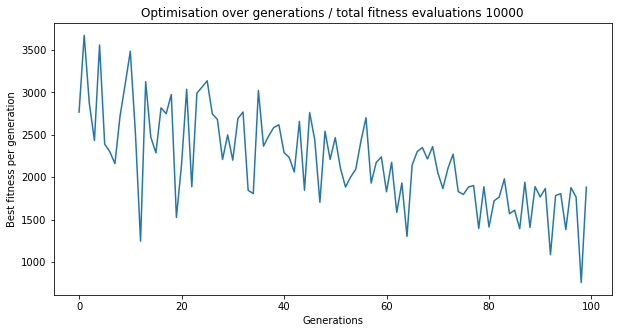

In [37]:
print("BBP1")
BBP = 1
# p: num_ants (100 or 10)
p = 100
# e: pheromone_evaporation_rate (0.9 or 0.5)
e = 0.9
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()


In [38]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  1
Initial State: 
Fitness:    Best:  3110   Worst:  10570   Average:  6459.6
Result:
Fitness:    Best:  1734   Worst:  8384   Average:  3886.61


In [39]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  1
Initial State: 
Fitness:    Best:  2955   Worst:  10125   Average:  6264.82
Result:
Fitness:    Best:  1618   Worst:  8075   Average:  3950.9


In [40]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  1
Initial State: 
Fitness:    Best:  2347   Worst:  10192   Average:  6222.98
Result:
Fitness:    Best:  1535   Worst:  7981   Average:  3920.94


In [41]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  1
Initial State: 
Fitness:    Best:  3055   Worst:  9541   Average:  6106.39
Result:
Fitness:    Best:  1225   Worst:  6994   Average:  3954.3


BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1067260   Worst:  2299065   Average:  1569805.86
Result:
Fitness:    Best:  884609   Worst:  1934245   Average:  1258976.05


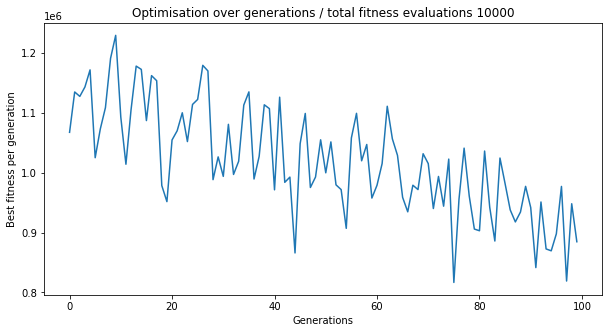

In [84]:
print("BBP2")
BBP = 2
# p: num_ants (100 or 10)
p = 100
# e: pheromone_evaporation_rate (0.9 or 0.5)
e = 0.9
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [43]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  2
Initial State: 
Fitness:    Best:  1091390   Worst:  2270861   Average:  1593611.29
Result:
Fitness:    Best:  898511   Worst:  1755034   Average:  1311818.17


In [44]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  2
Initial State: 
Fitness:    Best:  1075175   Worst:  2295318   Average:  1599717.1
Result:
Fitness:    Best:  883742   Worst:  1656699   Average:  1161797.23


In [45]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  2
Initial State: 
Fitness:    Best:  1118722   Worst:  2624035   Average:  1594898.12
Result:
Fitness:    Best:  829675   Worst:  1786002   Average:  1244052.63


In [46]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  2
Initial State: 
Fitness:    Best:  1202595   Worst:  2296925   Average:  1593343.87
Result:
Fitness:    Best:  857620   Worst:  1785110   Average:  1235164.49


# Experiment 2

# Run five trials of the ACO with p = 100 and e = 0.50 

In [47]:
print("BBP1")
BBP = 1
p = 100
e = 0.5
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

BBP1
Trial 1, BBP =  1
Initial State: 
Fitness:    Best:  3390   Worst:  11258   Average:  6262.57
Result:
Fitness:    Best:  2322   Worst:  9069   Average:  5383.5


Trial 2, BBP =  1
Initial State: 
Fitness:    Best:  2798   Worst:  13733   Average:  6253.15
Result:
Fitness:    Best:  2595   Worst:  8772   Average:  5437.28


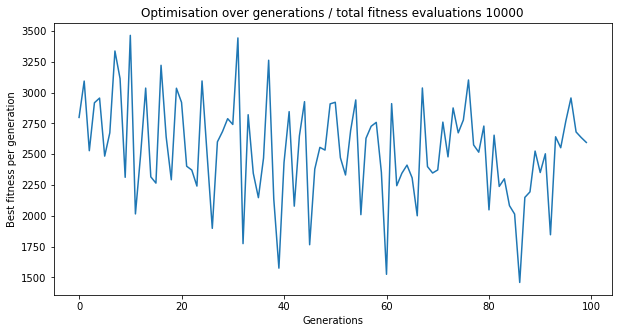

In [48]:
print("Trial 2, BBP = ",BBP)
BBP = 1
p = 100
e = 0.5
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [49]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  1
Initial State: 
Fitness:    Best:  3384   Worst:  10563   Average:  6286.75
Result:
Fitness:    Best:  2363   Worst:  10348   Average:  5217.44


In [50]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  1
Initial State: 
Fitness:    Best:  3236   Worst:  11362   Average:  6395.15
Result:
Fitness:    Best:  2936   Worst:  9524   Average:  5478.67


In [51]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  1
Initial State: 
Fitness:    Best:  2334   Worst:  11924   Average:  6546.73
Result:
Fitness:    Best:  2016   Worst:  8555   Average:  5383.26


BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1147949   Worst:  2189465   Average:  1564907.37
Result:
Fitness:    Best:  1086883   Worst:  2347116   Average:  1495412.73
Initial State: 
Fitness:    Best:  942993   Worst:  2187549   Average:  1553287.77
Result:
Fitness:    Best:  948067   Worst:  1977954   Average:  1459980.3


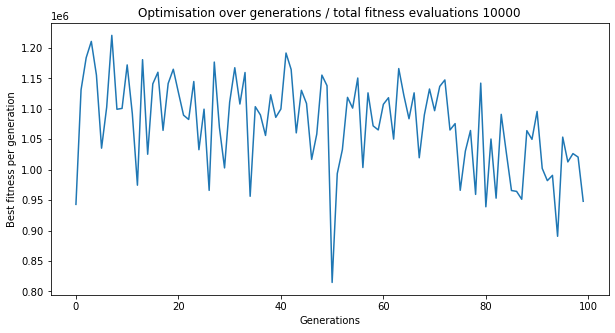

In [79]:
print("BBP2")
BBP = 2
p = 100
e = 0.5
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [53]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  2
Initial State: 
Fitness:    Best:  1111637   Worst:  2182105   Average:  1580835.69
Result:
Fitness:    Best:  999488   Worst:  2300203   Average:  1489139.05


In [54]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  2
Initial State: 
Fitness:    Best:  1177503   Worst:  2127371   Average:  1548169.87
Result:
Fitness:    Best:  968312   Worst:  2126915   Average:  1457660.04


In [55]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  2
Initial State: 
Fitness:    Best:  1150695   Worst:  2299898   Average:  1571832.82
Result:
Fitness:    Best:  1033235   Worst:  2137417   Average:  1491747.19


In [56]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  2
Initial State: 
Fitness:    Best:  1044806   Worst:  2126490   Average:  1592219.07
Result:
Fitness:    Best:  1012107   Worst:  2238643   Average:  1482100.69


# Experiment 3

# Run five trials of the ACO with p = 10, and e = 0.90

BBP1
Trial 1, BBP =  1
Initial State: 
Fitness:    Best:  4334   Worst:  7549   Average:  6085.4
Result:
Fitness:    Best:  1306   Worst:  1306   Average:  1306.0


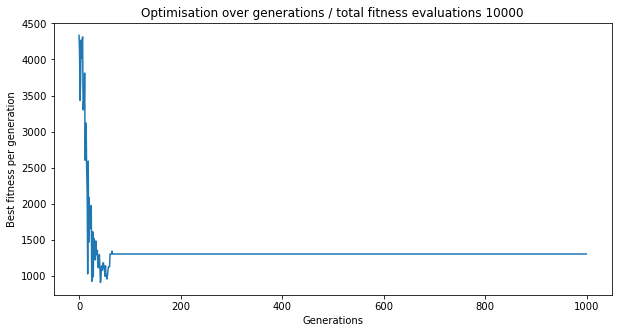

In [57]:
print("BBP1")
BBP = 1
p = 10
e = 0.9
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [58]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  1
Initial State: 
Fitness:    Best:  3109   Worst:  7587   Average:  5198.2
Result:
Fitness:    Best:  1781   Worst:  1781   Average:  1781.0


In [59]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  1
Initial State: 
Fitness:    Best:  4067   Worst:  7601   Average:  5615.0
Result:
Fitness:    Best:  2979   Worst:  2979   Average:  2979.0


In [60]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  1
Initial State: 
Fitness:    Best:  4237   Worst:  7831   Average:  6206.9
Result:
Fitness:    Best:  5119   Worst:  5119   Average:  5119.0


In [61]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  1
Initial State: 
Fitness:    Best:  4177   Worst:  9757   Average:  6404.2
Result:
Fitness:    Best:  4219   Worst:  4219   Average:  4219.0


BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1143853   Worst:  2159165   Average:  1637843.2
Result:
Fitness:    Best:  1153905   Worst:  1153905   Average:  1153905.0


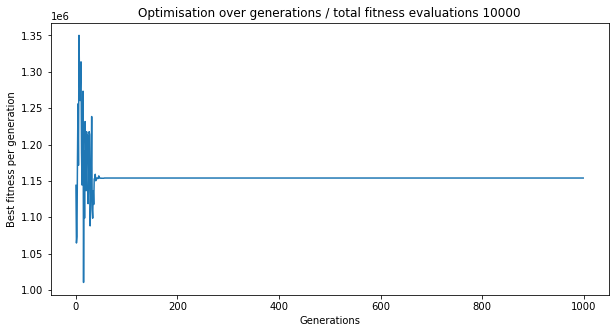

In [83]:
print("BBP2")
BBP = 2
p = 10
e = 0.9
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [63]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  2
Initial State: 
Fitness:    Best:  1138472   Worst:  1970851   Average:  1633921.7
Result:
Fitness:    Best:  1071041   Worst:  1071041   Average:  1071041.0


In [64]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  2
Initial State: 
Fitness:    Best:  1273090   Worst:  1766749   Average:  1527720.8
Result:
Fitness:    Best:  1571185   Worst:  1571185   Average:  1571185.0


In [65]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  2
Initial State: 
Fitness:    Best:  1211832   Worst:  1804012   Average:  1557763.1
Result:
Fitness:    Best:  972337   Worst:  972337   Average:  972337.0


In [66]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  2
Initial State: 
Fitness:    Best:  1199746   Worst:  1685006   Average:  1429298.4
Result:
Fitness:    Best:  1185903   Worst:  1185903   Average:  1185903.0


# Experiment 4
# Run five trials of the ACO with p = 10, and e = 0.50 

In [67]:
print("BBP1")
BBP = 1
p = 10
e = 0.5
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)


BBP1
Trial 1, BBP =  1
Initial State: 
Fitness:    Best:  2865   Worst:  10633   Average:  7228.3
Result:
Fitness:    Best:  782   Worst:  782   Average:  782.0


Trial 2, BBP =  1
Initial State: 
Fitness:    Best:  4098   Worst:  7728   Average:  5494.4
Result:
Fitness:    Best:  225   Worst:  225   Average:  225.0


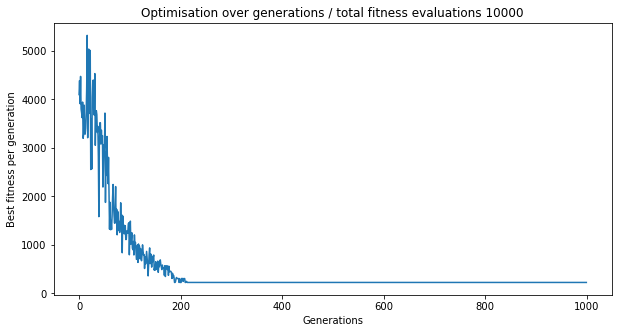

In [68]:
print("Trial 2, BBP = ",BBP)
BBP = 1
p = 10
e = 0.5
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [69]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  1
Initial State: 
Fitness:    Best:  3172   Worst:  9611   Average:  6364.4
Result:
Fitness:    Best:  841   Worst:  841   Average:  841.0


In [70]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  1
Initial State: 
Fitness:    Best:  4303   Worst:  10156   Average:  6392.9
Result:
Fitness:    Best:  867   Worst:  867   Average:  867.0


In [71]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  1
Initial State: 
Fitness:    Best:  4415   Worst:  7182   Average:  5807.3
Result:
Fitness:    Best:  698   Worst:  698   Average:  698.0


BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1136297   Worst:  2134017   Average:  1565479.2
Result:
Fitness:    Best:  1029651   Worst:  1029651   Average:  1029651.0


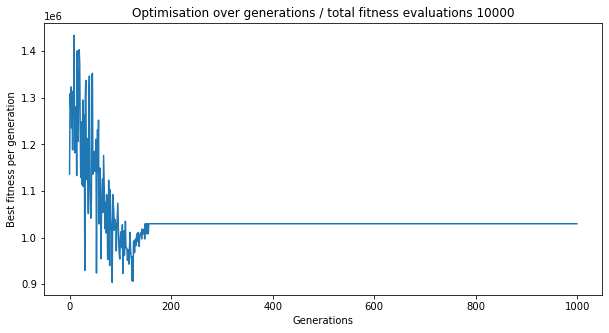

In [82]:
print("BBP2")
BBP = 2
p = 10
e = 0.5
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 10000")
plt.show()

In [73]:
print("Trial 2, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 2, BBP =  2
Initial State: 
Fitness:    Best:  1160761   Worst:  1869650   Average:  1474142.6
Result:
Fitness:    Best:  937403   Worst:  937403   Average:  937403.0


In [74]:
print("Trial 3, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 3, BBP =  2
Initial State: 
Fitness:    Best:  1285617   Worst:  1646614   Average:  1463717.5
Result:
Fitness:    Best:  1266600   Worst:  1266600   Average:  1266600.0


In [75]:
print("Trial 4, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 4, BBP =  2
Initial State: 
Fitness:    Best:  1188595   Worst:  2155534   Average:  1554693.9
Result:
Fitness:    Best:  1228244   Worst:  1228244   Average:  1228244.0


In [76]:
print("Trial 5, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP)

Trial 5, BBP =  2
Initial State: 
Fitness:    Best:  1446384   Worst:  2305410   Average:  1699244.5
Result:
Fitness:    Best:  1127782   Worst:  1127782   Average:  1127782.0


# Graph BBP1 results

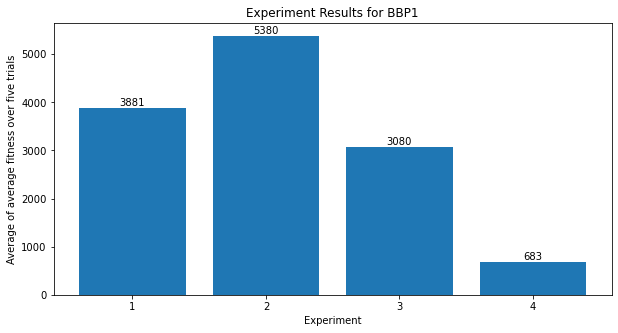

In [92]:
experiment = ["1", "2", "3", "4"]
averageFitness = np.array([3881, 5380, 3080, 683])

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(experiment, averageFitness)
plt.xlabel("Experiment")
plt.ylabel("Average of average fitness over five trials")
plt.title("Experiment Results for BBP1")
ax.bar_label(ax.containers[0])
plt.show()

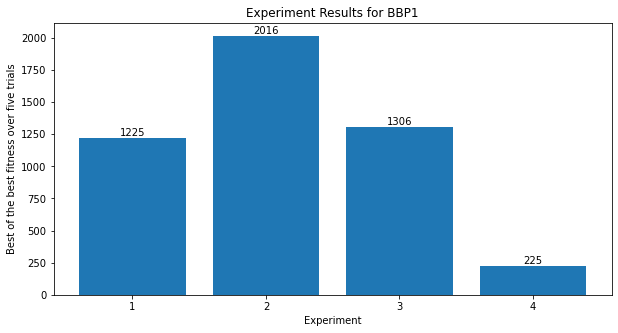

In [91]:

experiment = ["1", "2", "3", "4"]
averageFitness = np.array([1225, 2016, 1306, 225])

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(experiment, averageFitness)
plt.xlabel("Experiment")
plt.ylabel("Best of the best fitness over five trials")
plt.title("Experiment Results for BBP1")
ax.bar_label(ax.containers[0])
plt.show()

# Graph BBP2 results

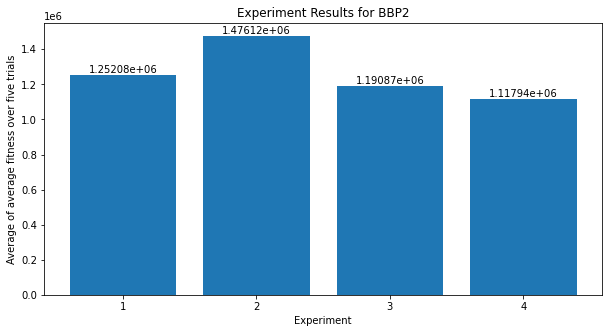

In [90]:

experiment = ["1", "2", "3", "4"]
averageFitness = np.array([1252083, 1476125, 1190874, 1117936])

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(experiment, averageFitness)
plt.xlabel("Experiment")
plt.ylabel("Average of average fitness over five trials")
plt.title("Experiment Results for BBP2")
ax.bar_label(ax.containers[0])
plt.show()

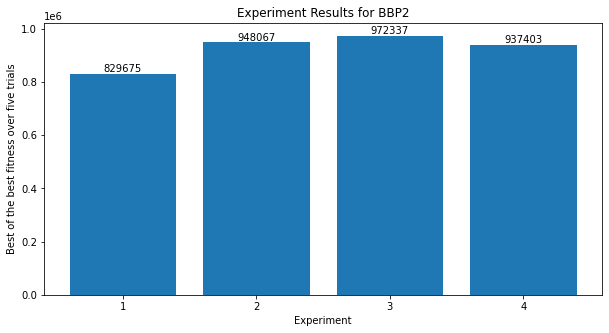

In [89]:

experiment = ["1", "2", "3", "4"]
averageFitness = np.array([829675, 948067, 972337, 937403])

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(experiment, averageFitness)
plt.xlabel("Experiment")
plt.ylabel("Best of the best fitness over five trials")
plt.title("Experiment Results for BBP2")
ax.bar_label(ax.containers[0])
plt.show()

# Further experimentation

BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1048784   Worst:  2463322   Average:  1564593.52
Result:
Fitness:    Best:  814700   Worst:  1844383   Average:  1270921.2166666666


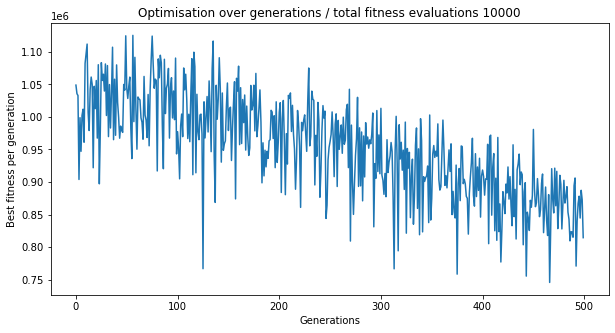

In [87]:
print("BBP2")
BBP = 2
p = 300
e = 0.50
generations = 500 # determine how many generations regardless of fitness evaluations
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP, generations)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 150000")
plt.show()

# too many ants not enough generations for 10000 fitness evaluations 

BBP2
Trial 1, BBP =  2
Initial State: 
Fitness:    Best:  1035445   Worst:  2575696   Average:  1560332.0275
Result:
Fitness:    Best:  782244   Worst:  1889239   Average:  1167653.3675


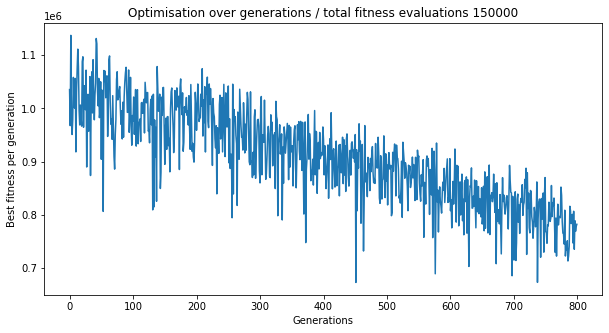

In [88]:
print("BBP2")
BBP = 2
p = 400
e = 0.50
generations = 800 # determine how many generations regardless of fitness evaluations
print("Trial 1, BBP = ",BBP)
x,y = ACO_BPP(p, e, BBP, generations)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, y)
plt.xlabel("Generations")
plt.ylabel("Best fitness per generation")
plt.title("Optimisation over generations / total fitness evaluations 150000")
plt.show()

# too many ants not enough generations for 10000 fitness evaluations 